<a href="https://colab.research.google.com/github/Jsaristizabalse/QuantumComputing/blob/main/QXQ_YLC_Week_3_Homework_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3: Introduction to Objects and Debugging**
---

### **Description**
In this homework assignment, you will learn how to work with objects in Python, how to interpret and correct coding errors, and how to search for and navigate documentation.

<br>

### **Homework Structure**
**Part 1**: [Objects, Methods, and Attributes](#p1)

**Part 2**: [Debugging](#p2)

**Part 3**: [Coding Challenges [OPTIONAL]](#p3)

<br>

### **Resources**
* [Python Basics Cheat Sheet](https://docs.google.com/document/d/1W8xeN-2wtyzM6sz33mGewNdBQ2sdE8dP8UJFhHG_4T4/)

<br>

### **Learning Objectives**
By the end of this homework assignment, you will:
* Understand how to interact with objects using methods and attributes.
* Improve your debugging skills by correcting common coding errors.
* Understand how to search for documentation in various libraries.

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [95]:
# @title
!pip install qiskit --quiet
import warnings
import sympy
import numpy
import matplotlib
import time
import math
from matplotlib import pyplot
from qiskit import QuantumCircuit
warnings.filterwarnings("ignore")

class baby():
  def __init__(self,age=0, mood="crying", hunger="hungry"):
    self.age = age
    self.mood = mood
    self.hunger = hunger
  def feed(self):
    self.hunger = "full"
  def play(self):
    self.mood = "happy"

def calculate_area(length, width):
  area = length * width
  return area

class plant():
  def __init__(self):
    self.planted = 0
    self.day_of_last_growth = 0
    self.day = 0
    self.water = 0
    self.light = 0
    self.health = 10
    self.stage = 0
    self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
    self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
  def water_plant(self,amount):
    if amount > 0:
      print("You watered your plant.")
      self.water += round(amount)
    elif amount < 0:
      raise ValueError("You can't remove water from your plant! You will have to wait a bit for it to dry out.")
    else:
      print("You decide to not water your plant.")
  def set_light(self,level):
    if level <0:
      raise ValueError("You can't set the light level to negative values.")
    elif level > 10:
      raise ValueError("Your light is not that strong")
    else:
      self.light = round(level)
      print("You set the light to level " + str(self.light))

  def check_health(self):
    print("Your plant's health is a " + str(self.health)+ "/" + str(10+(5*self.stage))+".")
    print("If you had to rate the wetness of the soil, it would be a " + str(self.water)+ "/10.")
    print("Your light is turned up to " + str(self.light)+ ".")
    if self.stage == 10:
      print("Your plant is full grown.")
  def wait(self,num_days):
    for i in range(num_days):
      self.day += 1
      print('Day ' + str(self.day))
      if self.perfect_light > self.light:
        print("Your plant needs more light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      elif self.perfect_light < self.light:
        print("Your plant needs less light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      else:
        print("Your plant looks happy with the light it has.")
      if self.perfect_water > self.water:
        print("Your plant needs more water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      elif self.perfect_water < self.water:
        print("Your plant needs less water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      else:
        print("Your plant looks happy with the water it had.")
      if self.perfect_light == self.light and self.perfect_water == self.water:
        self.health = (self.health + 10+(5*self.stage))/2
        if self.day- self.day_of_last_growth >= 5 and self.stage < 10:
          print("Your plant grew a bit! Its preferances may have changed.")
          self.stage += 1
          self.health += 5
          self.day_of_last_growth = self.day
          self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          if self.stage == 10:
            print("Congrats! Your plant is full grown.")
      self.water += -1*self.light
      if self.water < 0:
        self.water = 0
      if self.health <= 0:
        print("Your plant died! You decide to plant a new seed. Treat this one better!")
        self.planted = 0
        self.day_of_last_growth = 0
        self.day = 0
        self.water = 0
        self.light = 0
        self.health = 10
        self.stage = 0
        self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
        self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])

def dynamic_find_roots(a,b,c):
  if b**2-4*a*c == 0:
    return -b/(2*a)
  elif b**2 - 4*a*c <0:
    return (-b+1j*(4*a*c-b**2)**0.5)/(2*a),(-b-1j*(4*a*c-b**2)**0.5)/(2*a)
  elif b**2 - 4*a*c >0:
    return (-b+(b**2-4*a*c)**0.5)/(2*a),(-b-(b**2-4*a*c)**0.5)/(2*a)
print("Libraries imported successfully!")

Libraries imported successfully!


<a name="p1"></a>

---
## **Part 1: Objects, Methods, and Attributes**
---
Python and any libraries we install give us tons of objects to work with. In this part, we will practice interacting with objects using methods and attributes.

#### **Problem #1.1**

Create a `baby` object and set its age to 1. Then print out its "age" attribute.

In [18]:
jeremy =  baby()
jeremy.age = 1
jeremy.age

1

#### **Problem #1.2**

Print out the baby's `hunger` and `mood` attributes.

In [17]:
print(jeremy.hunger)
print(jeremy.mood)

hungry
crying


#### **Problem #1.3**

Now, use the baby's `feed` and `play` methods. Then print out its `hunger` and `mood` attributes once again.

In [26]:
jeremy.feed()
jeremy.play()

In [25]:
print(jeremy.mood)
print(jeremy.hunger)

happy
full


#### **Problem #1.4**

Create a `plant` object using its corresponding function, and use the `check_health` method to measure the plant's health.

In [130]:
potato = plant()
potato.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 0.


#### **Problem #1.5**

Using the necessary methods and attributes, get your plant to grow a bit.

**Hint:** Read through the `plant` class to see if there is a way to give it the perfect amount of water and light without guessing and checking.

In [128]:
light = potato.perfect_light
water = potato.perfect_water
lifetime = potato.day
days_since_growth = potato.day_of_last_growth
level = potato.stage

# while level <10:
potato.set_light(light)
potato.water_plant(water)
print()

potato.check_health()
print()
potato.wait(1)
print()
potato.check_health()



You set the light to level 1
You watered your plant.

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 6/10.
Your light is turned up to 1.

Day 1
Your plant looks happy with the light it has.
Your plant looks happy with the water it had.

Your plant's health is a 10.0/10.
If you had to rate the wetness of the soil, it would be a 5/10.
Your light is turned up to 1.


In [129]:

  potato.set_light(light)
  potato.water_plant(water)
  print()

  potato.check_health()
  print()
  potato.wait(1)
  print()
  potato.check_health()


Streaming output truncated to the last 5000 lines.
Your plant needs less water

Your plant's health is a 3.500000000000002/10.
If you had to rate the wetness of the soil, it would be a 25/10.
Your light is turned up to 1.
You set the light to level 1
You watered your plant.

Your plant's health is a 3.500000000000002/10.
If you had to rate the wetness of the soil, it would be a 31/10.
Your light is turned up to 1.

Day 6
Your plant needs more light
Your plant needs less water

Your plant's health is a 0.700000000000002/10.
If you had to rate the wetness of the soil, it would be a 30/10.
Your light is turned up to 1.
You set the light to level 1
You watered your plant.

Your plant's health is a 0.700000000000002/10.
If you had to rate the wetness of the soil, it would be a 36/10.
Your light is turned up to 1.

Day 7
Your plant needs more light
Your plant needs less water
Your plant died! You decide to plant a new seed. Treat this one better!

Your plant's health is a 10/10.
If you had t

KeyboardInterrupt: ignored

In [91]:
print(potato.perfect_light)
print(potato.perfect_water)
print(potato.day_of_last_growth)
print(potato.day)
print(potato.stage)
potato.check_health()


# if self.day- self.day_of_last_growth >= 5 and self.stage < 10:
#           print("Your plant grew a bit! Its preferances may have changed.")
#           self.stage += 1
#           self.health += 5
#           self.day_of_last_growth = self.day
#           self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
#           self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
#           if self.stage == 10:




1
8
0
6
0
Your plant's health is a 8.5/10.
If you had to rate the wetness of the soil, it would be a 2/10.
Your light is turned up to 1.


<a name="p2"></a>

---
## **Part 2: Debugging**
---

In this part, we will explore how to identify and correct errors in Python.

#### **Problem #2.1**

Debug the code shown below.

In [31]:
x = 17
y = 3
print(x*y)

51


#### **Problem #2.2**

Debug the code shown below.

In [32]:
my_list = [3, 1, 4, 1]
print(my_list[4-1])

1


#### **Problem #2.3**

Debug the code shown below.

In [131]:
oak =plant()
oak.check_health()
oak.set_light(6)
oak.water_plant(8)
oak.wait(3)
oak.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 0.
You set the light to level 6
You watered your plant.
Day 1
Your plant needs more light
Your plant needs less water
Day 2
Your plant needs more light
Your plant needs more water
Day 3
Your plant needs more light
Your plant needs more water
Your plant's health is a 8.500000000000002/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 6.


#### **Problem #2.4**

Debug the code shown below.

In [38]:
#f(x) = ax^2 + bx + c
a = 1
b = 8
c = 15
x1 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
x2 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
print(x1)
print(x2)

-3.0
-5.0


#### **Problem #2.5**

Debug the code shown below.

In [40]:
alisha = baby()
alisha.age = 3
print(alisha.age)

3


<a name="p3"></a>

---
## **Part 3: Coding Challenges [OPTIONAL]**
---

This part contains mini-projects that you can use to practice your Python skills! Remember, you can search for documentation that may help you.

#### **Problem #3.1**

Research the `numpy` module to find a function that allows you simulate rolling a weighted die that is twice as likely to land on 6 than a typical die. Then, simulate this die being rolled six times.

In [ ]:
# COMPLETE THIS CODE

#### **Problem #3.2**

Use the `append` method to add "six" to the list below. Then, write code the prints out the reversed list.

In [51]:
my_list = ["one","two","three", "four","five"]
my_list.append("six")
my_list = list(reversed(my_list))
print(my_list)

['six', 'five', 'four', 'three', 'two', 'one']


#### **Problem #3.3**

Research the `matplotlib` module to find a function that creates a line graph of the data provided below. For an extra challenge, label the x-axis "Year" and the y-axis "Number of Transistors per Microprocessor in Millions". This is a visual representation of Moore's Law!

In [52]:
import matplotlib.pyplot as plt

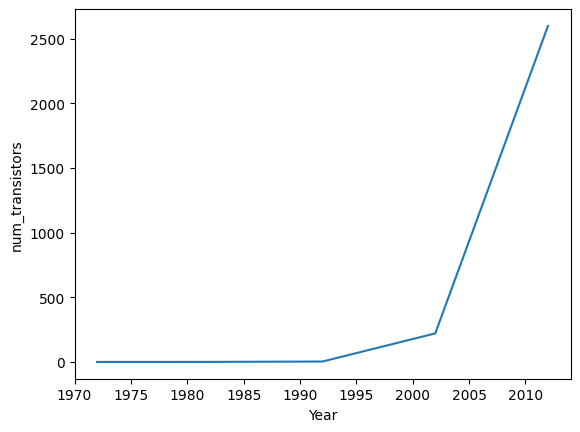

In [55]:
years = [1972, 1982, 1992, 2002, 2012]
num_transistors = [.004, .14, 3.11, 220.67, 2600]

plt.plot(years,num_transistors)
plt.ylabel('num_transistors')
plt.xlabel('Year')
plt.show()



# End of notebook
---
© 2023 The Coding School, All rights reserved